### Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Import the data

In [68]:
file_path = r"C:\Users\PC\Desktop\Moringa\Phase_2\Group-5-phase-2-project\Data\kc_house_data.csv"
df = pd.read_csv(file_path)
df.head() #viewing the first 5 rows of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Conducting EDA

In [69]:
# Columns to drop
columns_to_drop = ['id','date', 'view','sqft_living','sqft_lot','sqft_above', 'sqft_basement', 
                   'yr_renovated','yr_built', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
0,221900.0,3,1.00,1.0,NaN,3,7,98178
1,538000.0,3,2.25,2.0,0.0,3,7,98125
2,180000.0,2,1.00,1.0,0.0,3,6,98028
3,604000.0,4,3.00,1.0,0.0,5,7,98136
4,510000.0,3,2.00,1.0,0.0,3,8,98074


In [70]:
#EDA and Data cleaning
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")

NULL VALUES: price            0
bedrooms         0
bathrooms        0
floors           0
waterfront    2376
condition        0
grade            0
zipcode          0
dtype: int64
SUMMARY STATISTICS:               price      bedrooms     bathrooms        floors    waterfront  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  19221.000000   
mean   5.402966e+05      3.373200      2.115826      1.494096      0.007596   
std    3.673681e+05      0.926299      0.768984      0.539683      0.086825   
min    7.800000e+04      1.000000      0.500000      1.000000      0.000000   
25%    3.220000e+05      3.000000      1.750000      1.000000      0.000000   
50%    4.500000e+05      3.000000      2.250000      1.500000      0.000000   
75%    6.450000e+05      4.000000      2.500000      2.000000      0.000000   
max    7.700000e+06     33.000000      8.000000      3.500000      1.000000   

          condition         grade       zipcode  
count  21597.000000  21597.000000  21597

In [71]:
print(house_df['waterfront'].dtype)
# Check unique values in the 'waterfront' column
print(house_df['waterfront'].unique())

float64
[nan  0.  1.]


In [72]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]
waterfront_mode

0.0

In [73]:
# Impute missing values with the mode of the 'waterfront' column
house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)


In [74]:
#Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()

Number of duplicate rows: 508


,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
1094,435000.0,3,2.50,2.0,0.0,3,7,98053
1810,439000.0,4,2.25,2.0,0.0,3,8,98011
2194,360000.0,4,2.50,2.0,0.0,3,8,98038
2400,322500.0,4,2.50,2.0,0.0,3,7,98038
2510,390000.0,3,1.75,1.0,0.0,3,7,98019


In [75]:
# Drop duplicate rows
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")

Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21089


### Regression statsmodels. 

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~bedrooms+bathrooms+floors+waterfront+condition+grade+zipcode'
# create a fitted model in one line
model = smf.ols(formula=f, data= house_df_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3400.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:01:14   Log-Likelihood:            -2.9235e+05
No. Observations:               21089   AIC:                         5.847e+05
Df Residuals:                   21081   BIC:                         5.848e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.868e+07   3.29e+06    -17.843      0.000   -6.51e+07   -5.22e+07
bedrooms    1.322e+04   2214.530      5.971      0.000    8881.749    1.76e+04
bathrooms   8.244e+04   3502.155     23.540      0.000    7.56e+04    8.93e+04
floors     -4.937e+04   3933.787    -12.550      0.000   -5.71e+04   -4.17e+04
waterfront  9.013e+05   2.12e+04     42.497      0.000     8.6e+05    9.43e+05
condition   6.797e+04   2782.464     24.428      0.000    6.25e+04    7.34e+04
grade       1.857e+05   2040.942     90.980      0.000    1.82e+05     1.9e+05
zipcode      585.3770     33.506     17.471      0.000     519.702     651.052
==============================================================================
Omnibus:                    17643.814   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1526879.276
Skew:                           3.524   Prob(JB):                         0.00
Kurtosis:                      44.085   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables. 
### plotting scatter plots to see the linearity of the scatter pots so as to identify cartegorical variables



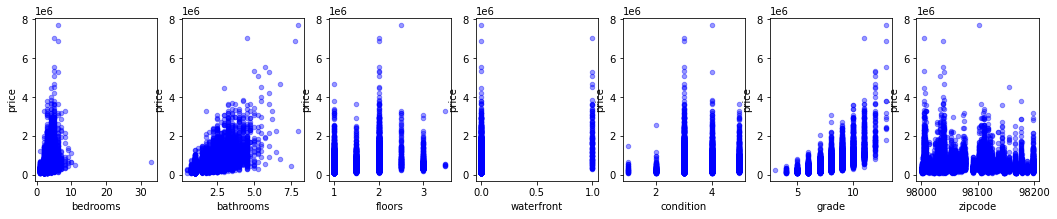

In [132]:
fig, axes = plt.subplots(nrows=1, ncols= 7, figsize=(18,3 ))

for xcol, ax in zip (['bedrooms','bathrooms','floors','waterfront','condition','grade','zipcode',],axes):
    house_df_cleaned.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='blue')


From this we learn that, bedrooms and bathrooms may have some linearity function. Floors, waterfront, condition , grade and zipcode are cartegorical variables, for it is harder to form a straight line

In [144]:
#Now lets form dummies for the cartegorical variables.
grade_dummies= pd.get_dummies(house_df_cleaned['grade'], prefix = 'grd', drop_first=True)
zipcode_dummies= pd.get_dummies(house_df_cleaned['zipcode'], prefix = 'zc', drop_first=True)

In [145]:
#we then form a dataframe with the new columns
house_df_categorical= house_df_cleaned.drop(['grade','zipcode'], axis=1)
house_df_categorical= pd.concat ( [ house_df_categorical, grade_dummies, zipcode_dummies], axis=1)
house_df_categorical.head ()

,price,bedrooms,bathrooms,floors,waterfront,condition,grd_4,grd_5,grd_6,grd_7,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,221900.0,3,1.00,1.0,0.0,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2.0,0.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,1.0,0.0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1.0,0.0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1.0,0.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
house_df_categorical.columns[1:]


Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grd_4',
       'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10', 'grd_11',
       'grd_12', 'grd_13', 'zc_98002', 'zc_98003', 'zc_98004', 'zc_98005',
       'zc_98006', 'zc_98007', 'zc_98008', 'zc_98010', 'zc_98011', 'zc_98014',
       'zc_98019', 'zc_98022', 'zc_98023', 'zc_98024', 'zc_98027', 'zc_98028',
       'zc_98029', 'zc_98030', 'zc_98031', 'zc_98032', 'zc_98033', 'zc_98034',
       'zc_98038', 'zc_98039', 'zc_98040', 'zc_98042', 'zc_98045', 'zc_98052',
       'zc_98053', 'zc_98055', 'zc_98056', 'zc_98058', 'zc_98059', 'zc_98065',
       'zc_98070', 'zc_98072', 'zc_98074', 'zc_98075', 'zc_98077', 'zc_98092',
       'zc_98102', 'zc_98103', 'zc_98105', 'zc_98106', 'zc_98107', 'zc_98108',
       'zc_98109', 'zc_98112', 'zc_98115', 'zc_98116', 'zc_98117', 'zc_98118',
       'zc_98119', 'zc_98122', 'zc_98125', 'zc_98126', 'zc_98133', 'zc_98136',
       'zc_98144', 'zc_98146', 'zc_98148', 'zc_98155', 'zc_98166

In [147]:
formula = 'price ~'+ '+' .join(house_df_categorical.columns[1:])
formula

'price ~bedrooms+bathrooms+floors+waterfront+condition+grd_4+grd_5+grd_6+grd_7+grd_8+grd_9+grd_10+grd_11+grd_12+grd_13+zc_98002+zc_98003+zc_98004+zc_98005+zc_98006+zc_98007+zc_98008+zc_98010+zc_98011+zc_98014+zc_98019+zc_98022+zc_98023+zc_98024+zc_98027+zc_98028+zc_98029+zc_98030+zc_98031+zc_98032+zc_98033+zc_98034+zc_98038+zc_98039+zc_98040+zc_98042+zc_98045+zc_98052+zc_98053+zc_98055+zc_98056+zc_98058+zc_98059+zc_98065+zc_98070+zc_98072+zc_98074+zc_98075+zc_98077+zc_98092+zc_98102+zc_98103+zc_98105+zc_98106+zc_98107+zc_98108+zc_98109+zc_98112+zc_98115+zc_98116+zc_98117+zc_98118+zc_98119+zc_98122+zc_98125+zc_98126+zc_98133+zc_98136+zc_98144+zc_98146+zc_98148+zc_98155+zc_98166+zc_98168+zc_98177+zc_98178+zc_98188+zc_98198+zc_98199'

In [148]:
from statsmodels.formula.api import ols
model.sumodel= ols(formula=formula, data = house_df_categorical).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     892.4
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:02:05   Log-Likelihood:            -2.8430e+05
No. Observations:               21089   AIC:                         5.688e+05
Df Residuals:                   21004   BIC:                         5.695e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.328e+04   1.74e+05     -0.191      0.849   -3.75e+05    3.09e+05
bedrooms    2.646e+04   1546.650     17.110      0.000    2.34e+04    2.95e+04
bathrooms   8.622e+04   2432.656     35.442      0.000    8.14e+04     9.1e+04
floors     -3.555e+04   2877.259    -12.354      0.000   -4.12e+04   -2.99e+04
waterfront  8.936e+05   1.48e+04     60.245      0.000    8.65e+05    9.23e+05
condition   4.109e+04   1965.310     20.910      0.000    3.72e+04    4.49e+04
grd_4      -6.273e+04   1.77e+05     -0.354      0.723    -4.1e+05    2.85e+05
grd_5      -1.065e+05   1.74e+05     -0.611      0.541   -4.48e+05    2.35e+05
grd_6      -9.719e+04   1.74e+05     -0.559      0.576   -4.38e+05    2.44e+05
grd_7      -7.549e+04   1.74e+05     -0.434      0.664   -4.16e+05    2.66e+05
grd_8        428.5080   1.74e+05      0.002      0.998   -3.41e+05    3.41e+05
grd_9       1.716e+05   1.74e+05      0.986      0.324    -1.7e+05    5.13e+05
grd_10      3.832e+05   1.74e+05      2.201      0.028    4.19e+04    7.25e+05
grd_11      6.962e+05   1.74e+05      3.994      0.000    3.55e+05    1.04e+06
grd_12      1.259e+06   1.75e+05      7.192      0.000    9.16e+05     1.6e+06
grd_13      2.625e+06   1.81e+05     14.516      0.000    2.27e+06    2.98e+06
zc_98002   -7722.0105   1.55e+04     -0.497      0.619   -3.82e+04    2.27e+04
zc_98003    -1.35e+04    1.4e+04     -0.962      0.336    -4.1e+04     1.4e+04
zc_98004    7.858e+05   1.37e+04     57.513      0.000    7.59e+05    8.13e+05
zc_98005    2.963e+05   1.65e+04     17.994      0.000    2.64e+05    3.29e+05
zc_98006    2.616e+05   1.24e+04     21.164      0.000    2.37e+05    2.86e+05
zc_98007    2.226e+05   1.74e+04     12.816      0.000    1.89e+05    2.57e+05
zc_98008    2.634e+05    1.4e+04     18.826      0.000    2.36e+05    2.91e+05
zc_98010    9.074e+04   1.98e+04      4.585      0.000     5.2e+04     1.3e+05
zc_98011    1.424e+05   1.56e+04      9.099      0.000    1.12e+05    1.73e+05
zc_98014    1.395e+05   1.83e+04      7.640      0.000    1.04e+05    1.75e+05
zc_98019    1.192e+05    1.6e+04      7.472      0.000     8.8e+04    1.51e+05
zc_98022    3.423e+04   1.48e+04      2.317      0.021    5273.288    6.32e+04
zc_98023   -4.174e+04   1.22e+04     -3.415      0.001   -6.57e+04   -1.78e+04
zc_98024    2.139e+05   2.15e+04      9.928      0.000    1.72e+05    2.56e+05
zc_98027     1.68e+05   1.28e+04     13.151      0.000    1.43e+05    1.93e+05
zc_98028    1.403e+05    1.4e+04     10.004      0.000    1.13e+05    1.68e+05
zc_98029    1.859e+05   1.38e+04     13.483      0.000    1.59e+05    2.13e+05
zc_98030   -5355.5660   1.44e+04     -0.372      0.710   -3.36e+04    2.29e+04
zc_98031   -3042.8446   1.42e+04     -0.215      0.830   -3.08e+04    2.47e+04
zc_98032   -6650.7648   1.83e+04     -0.364      0.716   -4.25e+04    2.92e+04
zc

In [157]:
#cutting all the variables with a p value higher than 0.05
formula = 'price ~bedrooms+bathrooms+floors+waterfront+condition+grd_10+grd_11+grd_12+grd_13+zc_98004+zc_98005+zc_98006+zc_98007+zc_98008+zc_98010+zc_98011+zc_98014+zc_98019+zc_98022+zc_98023+zc_98024+zc_98027+zc_98028+zc_98029+zc_98031+zc_98033+zc_98034+zc_98038+zc_98039+zc_98040+zc_98045+zc_98052+zc_98053+zc_98055+zc_98056+zc_98058+zc_98059+zc_98065+zc_98070+zc_98072+zc_98074+zc_98075+zc_98077+zc_98102+zc_98103+zc_98105+zc_98106+zc_98107+zc_98108+zc_98109+zc_98112+zc_98115+zc_98116+zc_98117+zc_98119+zc_98122+zc_98125+zc_98126+zc_98133+zc_98136+zc_98144+zc_98146+zc_98148+zc_98155+zc_98166+zc_98168+zc_98177+zc_98178+zc_98199'
model.sumodel= ols(formula=formula, data = house_df_categorical).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     892.4
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:37:07   Log-Likelihood:            -2.8430e+05
No. Observations:               21089   AIC:                         5.688e+05
Df Residuals:                   21004   BIC:                         5.695e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.328e+04   1.74e+05     -0.191      0.849   -3.75e+05    3.09e+05
bedrooms    2.646e+04   1546.650     17.110      0.000    2.34e+04    2.95e+04
bathrooms   8.622e+04   2432.656     35.442      0.000    8.14e+04     9.1e+04
floors     -3.555e+04   2877.259    -12.354      0.000   -4.12e+04   -2.99e+04
waterfront  8.936e+05   1.48e+04     60.245      0.000    8.65e+05    9.23e+05
condition   4.109e+04   1965.310     20.910      0.000    3.72e+04    4.49e+04
grd_4      -6.273e+04   1.77e+05     -0.354      0.723    -4.1e+05    2.85e+05
grd_5      -1.065e+05   1.74e+05     -0.611      0.541   -4.48e+05    2.35e+05
grd_6      -9.719e+04   1.74e+05     -0.559      0.576   -4.38e+05    2.44e+05
grd_7      -7.549e+04   1.74e+05     -0.434      0.664   -4.16e+05    2.66e+05
grd_8        428.5080   1.74e+05      0.002      0.998   -3.41e+05    3.41e+05
grd_9       1.716e+05   1.74e+05      0.986      0.324    -1.7e+05    5.13e+05
grd_10      3.832e+05   1.74e+05      2.201      0.028    4.19e+04    7.25e+05
grd_11      6.962e+05   1.74e+05      3.994      0.000    3.55e+05    1.04e+06
grd_12      1.259e+06   1.75e+05      7.192      0.000    9.16e+05     1.6e+06
grd_13      2.625e+06   1.81e+05     14.516      0.000    2.27e+06    2.98e+06
zc_98002   -7722.0105   1.55e+04     -0.497      0.619   -3.82e+04    2.27e+04
zc_98003    -1.35e+04    1.4e+04     -0.962      0.336    -4.1e+04     1.4e+04
zc_98004    7.858e+05   1.37e+04     57.513      0.000    7.59e+05    8.13e+05
zc_98005    2.963e+05   1.65e+04     17.994      0.000    2.64e+05    3.29e+05
zc_98006    2.616e+05   1.24e+04     21.164      0.000    2.37e+05    2.86e+05
zc_98007    2.226e+05   1.74e+04     12.816      0.000    1.89e+05    2.57e+05
zc_98008    2.634e+05    1.4e+04     18.826      0.000    2.36e+05    2.91e+05
zc_98010    9.074e+04   1.98e+04      4.585      0.000     5.2e+04     1.3e+05
zc_98011    1.424e+05   1.56e+04      9.099      0.000    1.12e+05    1.73e+05
zc_98014    1.395e+05   1.83e+04      7.640      0.000    1.04e+05    1.75e+05
zc_98019    1.192e+05    1.6e+04      7.472      0.000     8.8e+04    1.51e+05
zc_98022    3.423e+04   1.48e+04      2.317      0.021    5273.288    6.32e+04
zc_98023   -4.174e+04   1.22e+04     -3.415      0.001   -6.57e+04   -1.78e+04
zc_98024    2.139e+05   2.15e+04      9.928      0.000    1.72e+05    2.56e+05
zc_98027     1.68e+05   1.28e+04     13.151      0.000    1.43e+05    1.93e+05
zc_98028    1.403e+05    1.4e+04     10.004      0.000    1.13e+05    1.68e+05
zc_98029    1.859e+05   1.38e+04     13.483      0.000    1.59e+05    2.13e+05
zc_98030   -5355.5660   1.44e+04     -0.372      0.710   -3.36e+04    2.29e+04
zc_98031   -3042.8446   1.42e+04     -0.215      0.830   -3.08e+04    2.47e+04
zc_98032   -6650.7648   1.83e+04     -0.364      0.716   -4.25e+04    2.92e+04
zc

## multicollinearity features

In [153]:
house_df_categorical.corr()['price']

price         1.000000
bedrooms      0.308073
bathrooms     0.527712
floors        0.258839
waterfront    0.264730
                ...   
zc_98177      0.039733
zc_98178     -0.069522
zc_98188     -0.055126
zc_98198     -0.074505
zc_98199      0.083271
Name: price, Length: 85, dtype: float64

In [156]:
house_df_categorical.corr()[abs(house_df_categorical.corr()['price']) > 0.1]

,price,bedrooms,bathrooms,floors,waterfront,condition,grd_4,grd_5,grd_6,grd_7,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
price,1.000000,0.308073,0.527712,0.258839,0.264730,0.033980,-0.032058,-0.085840,-0.210364,-0.315091,...,-0.056714,-0.035977,-0.046556,-0.023247,-0.091824,0.039733,-0.069522,-0.055126,-0.074505,0.083271
bedrooms,0.308073,1.000000,0.512377,0.173962,-0.002537,0.026796,-0.068667,-0.114507,-0.237875,-0.101881,...,-0.030922,-0.013014,-0.007744,0.000688,-0.045963,0.002198,-0.006682,0.005127,-0.023407,-0.021396
bathrooms,0.527712,0.512377,1.000000,0.498498,0.063955,-0.125889,-0.056252,-0.140449,-0.365012,-0.312459,...,-0.072173,-0.021378,-0.056375,-0.029083,-0.098737,-0.002650,-0.054177,-0.026798,-0.048280,0.008588
floors,0.258839,0.173962,0.498498,1.000000,0.021386,-0.262050,-0.030220,-0.080999,-0.228657,-0.306931,...,-0.057956,-0.026587,-0.073584,-0.049276,-0.068228,-0.044243,-0.062772,-0.039073,-0.056350,-0.004712
waterfront,0.264730,-0.002537,0.063955,0.021386,1.000000,0.016057,-0.002989,0.012482,-0.007472,-0.045682,...,0.020364,-0.004308,0.007964,0.064339,-0.009365,-0.004005,0.037529,-0.006702,0.035673,-0.005567
grd_6,-0.210364,-0.237875,-0.365012,-0.228657,-0.007472,0.063791,-0.011580,-0.034846,1.000000,-0.271420,...,0.097208,-0.000953,0.036095,0.043202,0.131867,-0.015036,0.077447,0.010593,0.018332,-0.014458
grd_7,-0.315091,-0.101881,-0.312459,-0.306931,-0.045682,0.107277,-0.030048,-0.090420,-0.271420,1.000000,...,-0.003621,0.037159,0.041840,-0.009333,0.010197,-0.025884,0.028366,0.042516,0.047402,-0.022366
grd_9,0.233632,0.158854,0.264844,0.243893,0.007463,-0.082975,-0.013314,-0.040066,-0.120268,-0.312080,...,-0.030354,-0.019188,-0.034649,-0.012980,-0.040398,0.009324,-0.036103,-0.020749,-0.026220,0.014039
grd_10,0.339701,0.134716,0.273395,0.176111,0.051435,-0.065543,-0.008499,-0.025576,-0.076774,-0.199219,...,-0.023793,-0.012249,-0.031525,-0.014529,-0.024720,0.002697,-0.024499,-0.013762,-0.023623,0.028174
grd_11,0.357992,0.116800,0.249231,0.120838,0.068158,-0.046659,-0.004972,-0.014962,-0.044913,-0.116543,...,-0.016079,-0.007166,-0.015285,-0.002515,-0.015576,-0.008995,-0.015455,-0.011147,-0.012929,0.011593
